In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
tf.random.set_seed(42)


## Load and Explore the Data

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


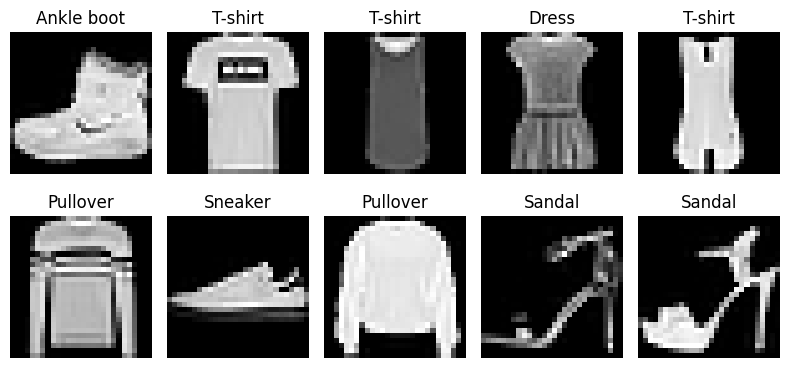

In [2]:
# Load Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Class labels
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Visualize some samples
plt.figure(figsize=(8,4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


## Build a Neural Network

In [3]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   # Input layer
    keras.layers.Dense(128, activation='relu'),   # Hidden layer
    keras.layers.Dense(10, activation='softmax')  # Output layer
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Compile the Model

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## Train the Model

In [5]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7769 - loss: 0.6437 - val_accuracy: 0.8527 - val_loss: 0.4104
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8583 - loss: 0.3981 - val_accuracy: 0.8645 - val_loss: 0.3706
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8723 - loss: 0.3509 - val_accuracy: 0.8700 - val_loss: 0.3588
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8829 - loss: 0.3216 - val_accuracy: 0.8710 - val_loss: 0.3598
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8905 - loss: 0.3005 - val_accuracy: 0.8710 - val_loss: 0.3636
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8963 - loss: 0.2835 - val_accuracy: 0.8705 - val_loss: 0.3691
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9010 - loss: 0.2704 - val_accuracy: 0.8698 - val_loss: 0.3782
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9048 - loss: 0.2589 - 

## Evaluate the Model

In [6]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8715 - loss: 0.3893

Test accuracy: 0.8696


## Make Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


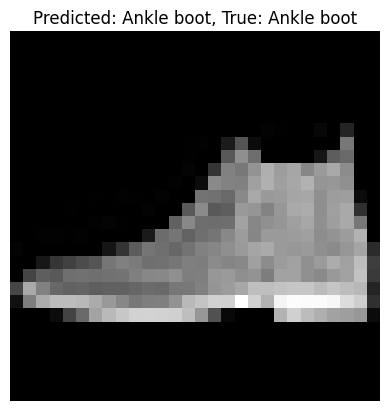

In [7]:
# Predict classes
predictions = model.predict(x_test)

# Show prediction for first image
predicted_label = np.argmax(predictions[0])
true_label = y_test[0]

plt.imshow(x_test[0], cmap='gray')
plt.title(f"Predicted: {class_names[predicted_label]}, True: {class_names[true_label]}")
plt.axis('off')
plt.show()


## Visualize Model Training

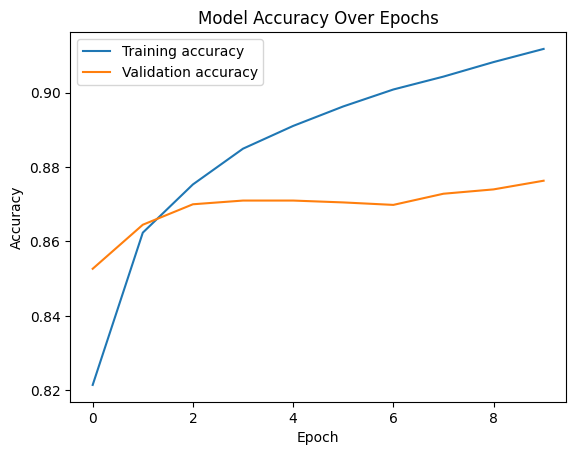

In [8]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy Over Epochs")
plt.show()
